## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [544]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student'
POSTGRES_DBNAME = 'mid_term_project'

In [5]:
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,
                                                                                        password=POSTGRES_PASSWORD,
                                                                                        ipaddress=POSTGRES_ADDRESS,
                                                                                        port=POSTGRES_PORT,
                                                                                        dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [124]:
flights_data = pd.read_sql_query('''SELECT * FROM flights WHERE fl_date >= '2019-01-01' ORDER BY RANDOM() LIMIT 100000''', cnx)

In [545]:
all_data = pd.read_sql_query('''SELECT * FROM flights
JOIN passengers ON passengers.unique_carrier=flights.mkt_unique_carrier
JOIN fuel_comsumption ON fuel_comsumption.unique_carrier=flights.mkt_unique_carrier
WHERE fl_date >= '2019-01-01'
ORDER BY RANDOM() LIMIT 50000''', cnx)

KeyboardInterrupt: 

In [125]:
flights_data.to_csv('flights_data.csv')

In [543]:
len(flights_data)

100000

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [84]:
y = pd.read_sql_query('''SELECT arr_delay FROM flights WHERE fl_date >= '2019-01-01' LIMIT 1500000''', cnx)
y.head()

,arr_delay
0,13.0
1,-22.0
2,-45.0
3,-5.0
4,-7.0


In [120]:
print(f'Missing values 1.5M data points: {y.isna().sum()}')
y[y>10].count()

Missing values 1.5M data points: arr_delay    24796
dtype: int64


arr_delay    302649
dtype: int64

In [87]:
#Only removing extreme outliers
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

y2 = y[~((y < (Q1 - 2.5 * IQR)) |(y > (Q3 + 2.5 * IQR))).any(axis=1)]

In [88]:
print(y.mean())
print(y2.mean())

arr_delay    4.55139
dtype: float64
arr_delay   -3.284861
dtype: float64


<AxesSubplot:>

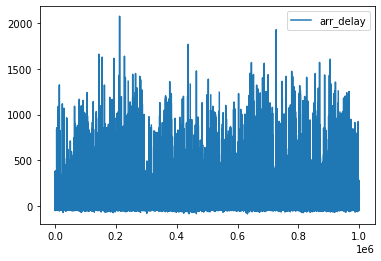

In [75]:
y.plot()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
# On Wes' analysis

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [350]:
weather_data = pd.read_sql_query('''SELECT * FROM flights WHERE fl_date = '2019-11-01' LIMIT 250''', cnx)

In [351]:
weather_data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-01,WN,WN,WN,2445,WN,N761RR,2445,14679,SAN,...,304.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-11-01,B6,B6,B6,1694,B6,N353JB,1694,13204,MCO,...,972.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-11-01,UA,UA,UA,2429,UA,N76504,2429,11618,EWR,...,1605.0,1.0,0.0,0.0,0.0,37.0,None,NaN,NaN,None
3,2019-11-01,UA,UA,UA,2429,UA,N69888,2429,12889,LAS,...,2227.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-11-01,UA,UA,UA,2427,UA,N427UA,2427,13495,MSY,...,305.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


#### **Task 4**: How are taxi times changing during the day? Does higher traffic lead to bigger taxi times?

### Setup column to groupby the hour of the day

In [292]:
df_taxi.groupby(['wheels_off']).agg({'taxi_out': 'mean', 'taxi_out': 'count'})

,taxi_out
wheels_off,
0.0,453
100.0,270
200.0,89
300.0,40
400.0,28
500.0,1350
600.0,6298
700.0,6090
800.0,5945


In [ ]:
df_taxi = flights_data[['fl_date','taxi_out', 'wheels_off']]

In [308]:
df_taxi1 = flights_data[['taxi_out', 'wheels_off']]
df_taxi1.wheels_off = df_taxi1.wheels_off.round(-2)

C:\Users\Sunny\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [300]:
df_taxi2 = df_taxi1.copy()

In [316]:
df_taxi1 = df_taxi1.groupby('wheels_off', as_index=False).count().rename(columns={'wheels_off': 'time_of_day'})

KeyError: 'wheels_off'

In [317]:
df_taxi1

,time_of_day,taxi_out
0,0.0,453
1,100.0,270
2,200.0,89
3,300.0,40
4,400.0,28
5,500.0,1350
6,600.0,6298
7,700.0,6090
8,800.0,5945
9,900.0,5555


In [313]:
df_taxi2 = df_taxi2.groupby(['wheels_off'], as_index=False).mean().rename(columns={'wheels_off': 'time_of_day'})
df_taxi2

,time_of_day,taxi_out
0,0.0,17.838852
1,100.0,16.133333
2,200.0,16.528090
3,300.0,15.075000
4,400.0,11.750000
5,500.0,13.277037
6,600.0,15.737695
7,700.0,16.901806
8,800.0,18.478890
9,900.0,19.183438


In [323]:
df_taxi = pd.merge(df_taxi1, df_taxi2, on='time_of_day').rename(columns={'taxi_out_x': 'num_flights', 'taxi_out_y': 'mean_taxi_time'})

In [325]:
# Traffic does not have much of an effect
df_taxi

,time_of_day,num_flights,mean_taxi_time
0,0.0,453,17.838852
1,100.0,270,16.133333
2,200.0,89,16.528090
3,300.0,40,15.075000
4,400.0,28,11.750000
5,500.0,1350,13.277037
6,600.0,6298,15.737695
7,700.0,6090,16.901806
8,800.0,5945,18.478890
9,900.0,5555,19.183438


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [333]:
arr_delay_filter = flights_data.arr_delay > 0
arr_dep_delay_filter = (flights_data.dep_delay > 0) & (flights_data.arr_delay > 0)
print(f' Percentage of delays caused by departure delays: {len(flights_data[arr_dep_delay_filter]) / len(flights_data[arr_delay_filter]) * 100}')

 Percentage of delays caused by departure delays: 71.6158491677714


In [336]:
len(flights_data[arr_dep_delay_filter])

24310

In [345]:
make_time_filter = (flights_data.dep_delay > flights_data.arr_delay)
len(flights_data.loc[make_time_filter][['dep_delay', 'arr_delay']])

# Flights do make it up in the air

70393

#### **Task 6**: How many states cover 50% of US air traffic? 

In [356]:
states_df = flights_data[['origin', 'origin_city_name']].head()

,origin,origin_city_name
0,OAK,"Oakland, CA"
1,MDW,"Chicago, IL"
2,MOB,"Mobile, AL"
3,ATL,"Atlanta, GA"
4,PHL,"Philadelphia, PA"


In [414]:
states = []
for city_state in flights_data.origin_city_name.str.split():
    states.append(city_state[1])

In [415]:
from collections import Counter

In [420]:
states_dict = dict(Counter(states))

total_flights = 0
count = 0
for i in states_dict:
        if total_flights < 50000:
            total_flights += states_dict[i]
            count += 1
        else:
            pass

In [422]:
print(f'The number of states that cover 50% of US air traffic is {count}')

The number of states that cover 50% of US air traffic is 18


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [425]:
flights_data[['dep_delay', 'arr_delay', 'air_time']]

,dep_delay,arr_delay,air_time
0,3.0,-9.0,170.0
1,15.0,12.0,134.0
2,5.0,-11.0,68.0
3,-5.0,-12.0,146.0
4,-4.0,-19.0,327.0
...,...,...,...
99995,-5.0,-2.0,269.0
99996,-3.0,6.0,51.0
99997,-8.0,-26.0,95.0
99998,-16.0,-17.0,322.0


In [437]:
print('Average air-time when there is a departure delay')
print(flights_data.loc[flights_data.dep_delay > 5][['dep_delay', 'arr_delay', 'air_time']].agg({'air_time': 'mean'}))

print('Average air-time when there is no departure delay')
print(flights_data.loc[flights_data.dep_delay < 5][['dep_delay', 'arr_delay', 'air_time']].agg({'air_time': 'mean'}))

# Planes do fly faster

Average air-time when there is a departure delay
air_time    111.458598
dtype: float64
Average air-time when there is no departure delay
air_time    106.75478
dtype: float64


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [448]:
haul = flights_data[['wheels_off', 'distance']]
haul.wheels_off = haul.wheels_off.round(-2)

C:\Users\Sunny\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [462]:
short = haul.loc[haul.distance < 700][['wheels_off', 'distance']]
medium = haul.loc[(haul.distance > 700) & (haul.distance < 3000)][['wheels_off', 'distance']]
long = haul.loc[haul.distance > 3000][['wheels_off', 'distance']]

In [471]:
short_haul = short.groupby('wheels_off', as_index=False).count().rename(columns={'wheels_off': 'time_of_day','distance': 'short_haul'})
medium_haul = medium.groupby('wheels_off', as_index=False).count().rename(columns={'wheels_off': 'time_of_day', 'distance': 'medium_haul'})
long_haul = long.groupby('wheels_off', as_index=False).count().rename(columns={'wheels_off': 'time_of_day', 'distance': 'long_haul'})

In [478]:
short_haul

,time_of_day,short_haul
0,0.0,130
1,100.0,47
2,200.0,15
3,300.0,3
4,400.0,2
5,500.0,922
6,600.0,3652
7,700.0,2927
8,800.0,3194
9,900.0,3170


In [501]:
df_haul = pd.merge(short_haul, medium_haul, on='time_of_day', how='outer')
df_haul = pd.merge(df_haul, long_haul, on='time_of_day', how='outer')

In [504]:
df_haul.fillna(0, inplace=True)

In [505]:
total_takeoff = df_haul.short_haul + df_haul.medium_haul + df_haul.long_haul

In [506]:
total_takeoff = pd.DataFrame(total_takeoff, columns=['total_takeoff'])
total_takeoff

,total_takeoff
0,453.0
1,270.0
2,89.0
3,40.0
4,28.0
5,1349.0
6,6291.0
7,6085.0
8,5942.0
9,5544.0


In [507]:
df_haul['total_takeoff'] = total_takeoff

In [510]:
df_haul.nlargest(10, columns='total_takeoff')

,time_of_day,short_haul,medium_haul,long_haul,total_takeoff
12,1200.0,3564,2720,9.0,6293.0
6,600.0,3652,2639,0.0,6291.0
10,1000.0,3712,2430,29.0,6171.0
7,700.0,2927,3151,7.0,6085.0
18,1800.0,3613,2424,5.0,6042.0
11,1100.0,3360,2570,19.0,5949.0
8,800.0,3194,2744,4.0,5942.0
14,1400.0,3327,2468,4.0,5799.0
16,1600.0,3268,2347,10.0,5625.0
15,1500.0,3387,2186,9.0,5582.0


#### **Task 9**: Find the top 10 busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [519]:
flights_data2 = flights_data.copy()

In [520]:
flights_data2.fl_date = pd.to_datetime(flights_data2.fl_date)

In [524]:
flights_data2['month'] = flights_data2.fl_date.dt.month

In [531]:
# average monthly delays by carrier
flights_data2[['mkt_unique_carrier', 'month', 'arr_delay']].groupby(['mkt_unique_carrier', 'month']).agg({'arr_delay': 'mean'})

arr_delay
mkt_unique_carrier month           
AA                 1       6.129565
                   2       8.827187
                   3       4.870493
                   4       6.294118
                   5       8.922339
...                             ...
WN                 8       1.979239
                   9      -2.833705
                   10      0.700425
                   11     -2.239114
                   12      4.624464

[120 rows x 1 columns]

In [534]:
# air carrier monthly distance
flights_data2[['mkt_unique_carrier', 'month', 'distance']].groupby(['mkt_unique_carrier', 'month']).agg({'distance': 'sum'})

distance
mkt_unique_carrier month           
AA                 1      1387224.0
                   2      1398216.0
                   3      1470172.0
                   4      1433305.0
                   5      1584425.0
...                             ...
WN                 8      1103807.0
                   9       980241.0
                   10     1043489.0
                   11     1000647.0
                   12     1047376.0

[120 rows x 1 columns]